In [1]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from drn_interactions.plots import heatmap, PAL_GREY_BLACK
from drn_interactions.config import Config
from drn_interactions.io import load_derived_generic, load_neurons
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from drn_interactions.transforms import SpikesHandler
from drn_interactions.io import load_neurons, load_derived_generic
import matplotlib.pyplot as plt
from drn_interactions.stats import prop_of_total
import numpy as np
from drn_interactions.spiketrains.plots import NeuronPropsPlotter
from drn_interactions.stats import prop_of_total
from drn_interactions.spiketrains.plots import (
    NeuronTypesFigureLoader,
    NeuronTypesFigurePreprocessor,
)
from drn_interactions.spiketrains.waveforms import WaveformPreprocessor
from sklearn.preprocessing import robust_scale
import numpy as np
from drn_interactions.config import Config

sns.set_theme(style="ticks", context="paper")

%load_ext autoreload
%autoreload 2

In [41]:
out_dir = Config.fig_dir / "spiketrains"
out_dir.mkdir(exist_ok=True, parents=True)
loader = NeuronTypesFigureLoader(
    example_session_name="hamilton_35", 
    example_session_t_start=110,
    )
(
    probe_neuron_types,
    probe_waveforms,
    probe_waveform_props,
    probe_spiketrain_props,
    single_unit_props,
    single_unit_neuron_types,
    spikes,
) = loader.load_all()

preprocessor = NeuronTypesFigurePreprocessor(
    waveform_preprocessor=WaveformPreprocessor(gaussian_sigma=1, medfilter_size=3),
)
df_props, waveforms, trains = preprocessor.preprocess_all(
    probe_neuron_types,
    probe_waveforms,
    probe_waveform_props,
    probe_spiketrain_props,
    single_unit_props,
    single_unit_neuron_types,
    spikes
)
display(df_props.sample(3))

,ID,Neuron Type,Electrode Type,Metric,Value
931,1947,SR,Silicon Probe,CV(ISI),0.824079
104,147,SR,Silicon Probe,Waveform Width (ms),NaN
463,2453,SR,Silicon Probe,Waveform Width (ms),1.361478


c:\users\roryl\repos\drn interactions\drn_interactions\plots\utils.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


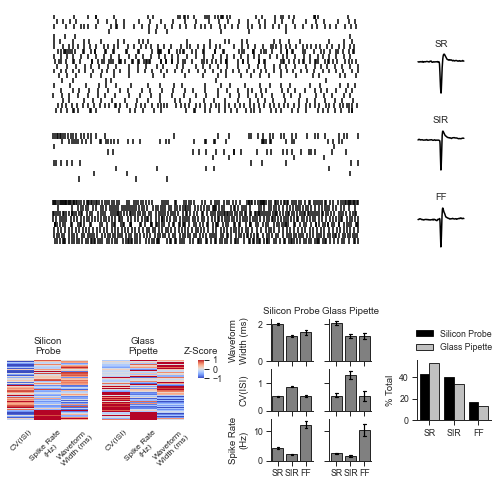

In [48]:
from drn_interactions.spiketrains.plots import NeuronTypesFigureGridMaker
from drn_interactions.spiketrains.plots import NeuronTypesPlotter

grid_maker = NeuronTypesFigureGridMaker()
plotter = NeuronTypesPlotter()

fig = grid_maker.make_figure(figsize=(7, 7), constrained_layout=False)
fig_top, fig_bottom = grid_maker.split_top_bottom(fig, hspace=0.05, height_ratios=[1.5, 1])


fig_raster, fig_waveforms = grid_maker.split_top_figs(fig_top)

plotter.plot_raster(
    fig=fig_raster, 
    trains=trains,
    height_ratios=[len(x) + 3 for x in trains.values()],
    )


axes_waves = plotter.plot_waveforms(
    fig=fig_waveforms,
    waveforms=waveforms,
)
for nt, ax in axes_waves.items():
    ax.set_title(nt)


fig_heats, fig_bar, fig_pct = grid_maker.split_bottom_figs(fig_bottom, wspace=0.05)

df_piv = preprocessor.pivot_props(df_props)
df_single_unit = df_piv.loc["Glass Pipette", slice(None), slice(None)].dropna().apply(robust_scale)
df_probe = df_piv.loc["Silicon Probe", slice(None), slice(None)].dropna().apply(robust_scale)

plotter.plot_heatmaps(
    df_props_probe=df_probe,
    df_props_single_unit=df_single_unit,
    fig=fig_heats,
    textwrap_width=10,
)

plotter.plot_bars(
    df_props=df_props,
    fig=fig_bar,
    textwrap_width=10,
)

plotter.plot_pct(
    df_props=df_props,
    fig=fig_pct,
)

fig.savefig(out_dir / "spiketrainsfig.jpg", dpi=300)
plt.show()
